In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

# Duration error histogram between target mels and predicted mels

In [2]:
manifests={"test":"hifigan_test_ft.json", "train":"hifigan_train_ft.json", "val":"hifigan_val_ft.json"}

target_mels_path = "/github/datasets/openslr-95-german-neutral-tts/orig_synmels/"


In [138]:
def extract_duration(manifest_path):
    durations = []
    with open(manifest_path, "r") as f:
        for i, line in enumerate(f):
            line_dict = json.loads(line)
            mel_path = line_dict['mel_filepath']
            mel = np.load(mel_path)
            durations.append(mel.shape[1])
    return np.array(durations)

def generate_error_histogram(manifest_A, manifest_B, title="histogram of result"):
    print("manifest_A: "+manifest_A)
    print("manifest_B: "+manifest_B)
    durations_A, durations_B = extract_duration(manifest_A), extract_duration(manifest_B)
    print(durations_A.shape, durations_B.shape)
    error = (durations_B - durations_A)/durations_A
    print("Mean: ", str(np.mean(error)))
    print("Variance: ", str(np.var(error)))
    bins = np.arange(-1,1.2,0.2)
    fig,ax = plt.subplots(1, 1)
    data_gen, bins_gen, _ = ax.hist(error, bins=bins)
    ax.set_title(title)
    ax.set_xticks(bins)
    ax.set_xlabel('(tar_mel_dur - pred_mel_dur) / tar_mel_dur')
    ax.set_ylabel('number of samples')
    plt.show()
    perfect_utterances = (error.shape[0] - np.count_nonzero(error))
    total_utterances = (error.shape[0])
    print("Number of utterances with 0.0 error: " + str(perfect_utterances) + " out of: " + str(total_utterances) + ". ~ " + str(round(perfect_utterances / total_utterances * 100, 4)) + "%")
    for i in range(len(bins_gen[:-1])):
        print("Between "+ str(round(bins_gen[i], 2)) +" and "+ str(round(bins_gen[i+1], 2)) +": " + str(data_gen[i]) + " out of: " + str(total_utterances) + ". ~ " + str(round(data_gen[i] / total_utterances * 100, 4)) + "%")
    

## Histogram A: For target mels and mels predicted by Fastpitch trained from scratch on German Dataset (R1) at 999 epochs

In [139]:
r1_synmels="/github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/"

Generating test set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_test_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_test_ft.json
(4535,) (4535,)
Mean:  -0.02717564366869392
Variance:  0.009566131363876636


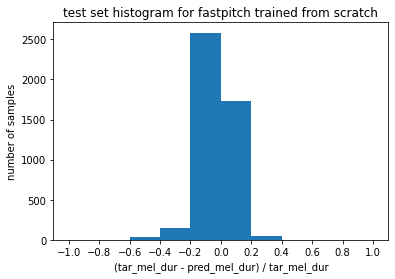

Number of utterances with 0.0 error: 96 out of: 4535. ~ 2.1169%
Between -1.0 and -0.8: 0.0 out of: 4535. ~ 0.0%
Between -0.8 and -0.6: 2.0 out of: 4535. ~ 0.0441%
Between -0.6 and -0.4: 30.0 out of: 4535. ~ 0.6615%
Between -0.4 and -0.2: 145.0 out of: 4535. ~ 3.1974%
Between -0.2 and -0.0: 2582.0 out of: 4535. ~ 56.935%
Between -0.0 and 0.2: 1726.0 out of: 4535. ~ 38.0595%
Between 0.2 and 0.4: 49.0 out of: 4535. ~ 1.0805%
Between 0.4 and 0.6: 1.0 out of: 4535. ~ 0.0221%
Between 0.6 and 0.8: 0.0 out of: 4535. ~ 0.0%
Between 0.8 and 1.0: 0.0 out of: 4535. ~ 0.0%
Generating train set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_train_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_train_ft.json
(15870,) (15870,)
Mean:  -0.011702737144519125
Variance:  0.0018308431613788605


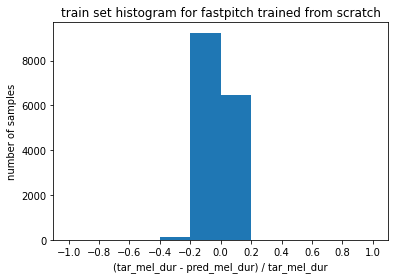

Number of utterances with 0.0 error: 1004 out of: 15870. ~ 6.3264%
Between -1.0 and -0.8: 0.0 out of: 15870. ~ 0.0%
Between -0.8 and -0.6: 1.0 out of: 15870. ~ 0.0063%
Between -0.6 and -0.4: 12.0 out of: 15870. ~ 0.0756%
Between -0.4 and -0.2: 143.0 out of: 15870. ~ 0.9011%
Between -0.2 and -0.0: 9240.0 out of: 15870. ~ 58.2231%
Between -0.0 and 0.2: 6469.0 out of: 15870. ~ 40.7624%
Between 0.2 and 0.4: 5.0 out of: 15870. ~ 0.0315%
Between 0.4 and 0.6: 0.0 out of: 15870. ~ 0.0%
Between 0.6 and 0.8: 0.0 out of: 15870. ~ 0.0%
Between 0.8 and 1.0: 0.0 out of: 15870. ~ 0.0%
Generating val set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_val_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r1_999_difflen/hifigan_val_ft.json
(2267,) (2267,)
Mean:  -0.027325467347937903
Variance:  0.009639403705501124


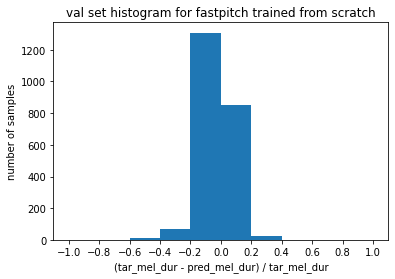

Number of utterances with 0.0 error: 37 out of: 2267. ~ 1.6321%
Between -1.0 and -0.8: 0.0 out of: 2267. ~ 0.0%
Between -0.8 and -0.6: 1.0 out of: 2267. ~ 0.0441%
Between -0.6 and -0.4: 15.0 out of: 2267. ~ 0.6617%
Between -0.4 and -0.2: 68.0 out of: 2267. ~ 2.9996%
Between -0.2 and -0.0: 1307.0 out of: 2267. ~ 57.6533%
Between -0.0 and 0.2: 849.0 out of: 2267. ~ 37.4504%
Between 0.2 and 0.4: 27.0 out of: 2267. ~ 1.191%
Between 0.4 and 0.6: 0.0 out of: 2267. ~ 0.0%
Between 0.6 and 0.8: 0.0 out of: 2267. ~ 0.0%
Between 0.8 and 1.0: 0.0 out of: 2267. ~ 0.0%


In [140]:
for key in manifests.keys():
    print("Generating "+key+" set histogram")
    generate_error_histogram(target_mels_path+manifests[key], r1_synmels+manifests[key], title=key+" set histogram for fastpitch trained from scratch")
    

## Histogram B: For target mels and mels predicted by Fastpitch_en finetuned on German Dataset (R3) at 149 epochs

In [141]:
r3_synmels="/github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/"

Generating test set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_test_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_test_ft.json
(4535,) (4535,)
Mean:  -0.023758765907030667
Variance:  0.010214630263560382


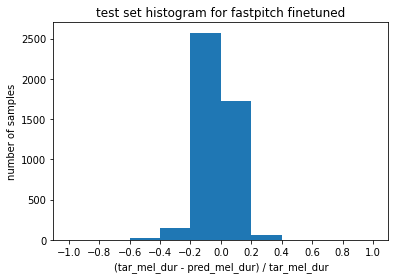

Number of utterances with 0.0 error: 94 out of: 4535. ~ 2.0728%
Between -1.0 and -0.8: 0.0 out of: 4535. ~ 0.0%
Between -0.8 and -0.6: 3.0 out of: 4535. ~ 0.0662%
Between -0.6 and -0.4: 21.0 out of: 4535. ~ 0.4631%
Between -0.4 and -0.2: 145.0 out of: 4535. ~ 3.1974%
Between -0.2 and -0.0: 2572.0 out of: 4535. ~ 56.7144%
Between -0.0 and 0.2: 1724.0 out of: 4535. ~ 38.0154%
Between 0.2 and 0.4: 64.0 out of: 4535. ~ 1.4112%
Between 0.4 and 0.6: 3.0 out of: 4535. ~ 0.0662%
Between 0.6 and 0.8: 2.0 out of: 4535. ~ 0.0441%
Between 0.8 and 1.0: 1.0 out of: 4535. ~ 0.0221%
Generating train set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_train_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_train_ft.json
(15870,) (15870,)
Mean:  -0.014656817322388544
Variance:  0.002787303194631478


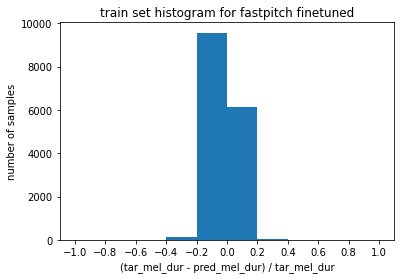

Number of utterances with 0.0 error: 592 out of: 15870. ~ 3.7303%
Between -1.0 and -0.8: 0.0 out of: 15870. ~ 0.0%
Between -0.8 and -0.6: 0.0 out of: 15870. ~ 0.0%
Between -0.6 and -0.4: 3.0 out of: 15870. ~ 0.0189%
Between -0.4 and -0.2: 137.0 out of: 15870. ~ 0.8633%
Between -0.2 and -0.0: 9568.0 out of: 15870. ~ 60.2899%
Between -0.0 and 0.2: 6132.0 out of: 15870. ~ 38.6389%
Between 0.2 and 0.4: 29.0 out of: 15870. ~ 0.1827%
Between 0.4 and 0.6: 1.0 out of: 15870. ~ 0.0063%
Between 0.6 and 0.8: 0.0 out of: 15870. ~ 0.0%
Between 0.8 and 1.0: 0.0 out of: 15870. ~ 0.0%
Generating val set histogram
manifest_A: /github/datasets/openslr-95-german-neutral-tts/orig_synmels/hifigan_val_ft.json
manifest_B: /github/datasets/openslr-95-german-neutral-tts/synmels_r3_149_difflen/hifigan_val_ft.json
(2267,) (2267,)
Mean:  -0.02219478690134062
Variance:  0.010296574952002936


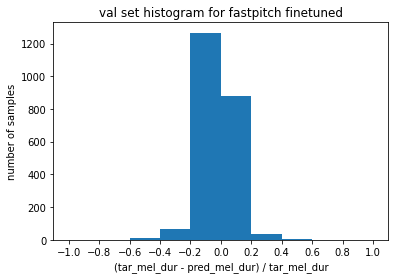

Number of utterances with 0.0 error: 47 out of: 2267. ~ 2.0732%
Between -1.0 and -0.8: 0.0 out of: 2267. ~ 0.0%
Between -0.8 and -0.6: 1.0 out of: 2267. ~ 0.0441%
Between -0.6 and -0.4: 12.0 out of: 2267. ~ 0.5293%
Between -0.4 and -0.2: 66.0 out of: 2267. ~ 2.9113%
Between -0.2 and -0.0: 1266.0 out of: 2267. ~ 55.8447%
Between -0.0 and 0.2: 881.0 out of: 2267. ~ 38.8619%
Between 0.2 and 0.4: 36.0 out of: 2267. ~ 1.588%
Between 0.4 and 0.6: 4.0 out of: 2267. ~ 0.1764%
Between 0.6 and 0.8: 1.0 out of: 2267. ~ 0.0441%
Between 0.8 and 1.0: 0.0 out of: 2267. ~ 0.0%


In [142]:
for key in manifests.keys():
    print("Generating "+key+" set histogram")
    generate_error_histogram(target_mels_path+manifests[key], r3_synmels+manifests[key], title=key+" set histogram for fastpitch finetuned")
    